In [1]:
%load_ext autoreload
%autoreload 2

In [118]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
from pathlib import Path
import json
import datetime


In [3]:
!pwd

/Users/federicocolangelo/Documents/Codici/MORA-Multi-Objective-Routing-Algorithm


In [140]:
exp_f = Path('./TB_100_No_faults/') 
df_MORA = pd.read_csv(exp_f/'MORA.csv')
df_EAR = pd.read_csv(exp_f/'EAR.csv')
df_D = pd.read_csv(exp_f/'Dijkstra.csv')

In [132]:
x_axis = np.arange(len(df_MORA))
m_size = 7.5
attributes = [df_MORA.columns[1], df_MORA.columns[2], df_MORA.columns[3], df_MORA.columns[6], df_MORA.columns[7]]
attributes

['Power consumption [W]',
 'Reliability score (Max)',
 'Reliability score (# above 60%)',
 'Premium SLA violations',
 'Assured SLA violations']

In [141]:
def plot_compare(att):
    fig = go.Figure()
    pw_MORA = df_MORA[att]
    pw_EAR = df_EAR[att]
    pw_D = df_D[att]
    fig.add_trace(go.Scatter(x=x_axis, y=pw_MORA,
                        mode='lines',
                        line=dict(width=2, color='#24bd1c'),
                        name='MORA'))

    fig.add_trace(go.Scatter(x=x_axis, y=pw_EAR,
                        mode='lines',
                        line=dict(width=2, color='#2b24ff'),
                        name='EAR'))

    fig.add_trace(go.Scatter(x=x_axis, y=pw_D,
                            mode='lines',
                            line=dict(width=2, color='#f54242'),
                            name='Dijkstra'))

    fig.update_layout(
    #title=att,
    autosize=False,
    width=1600,
    height=300,)
    
    fig.update_xaxes(title_text='Time')
    fig.update_yaxes(title_text=att)
    ticks = [50, 100, 150, 200, 250]
    fig.update_xaxes(
    tickvals = ticks,
    ticktext = [str(datetime.timedelta(seconds=t*5*60)) for t in ticks]#[str(datetime.timedelta(seconds=666)), 'February', 'March', 'April', 'May']
    )
    fig.show()
    
    
def bar_plot_compare(att):
    fig = go.Figure()
    pw_MORA = df_MORA[att]
    pw_EAR = df_EAR[att]
    pw_D = df_D[att]
    
    colors = ['#24bd1c', '#2b24ff', '#f54242']
    fig = go.Figure([go.Bar(x=['MORA', 'EAR', 'Dijkstra'], y=[np.sum(pw_MORA), np.sum(pw_EAR), np.sum(pw_D)], marker_color=colors)])
    
    fig.update_yaxes(title_text=att)

    fig.update_layout(
    #title=att,
    autosize=False,
    #width=1600,
    height=300,)


    fig.show()    

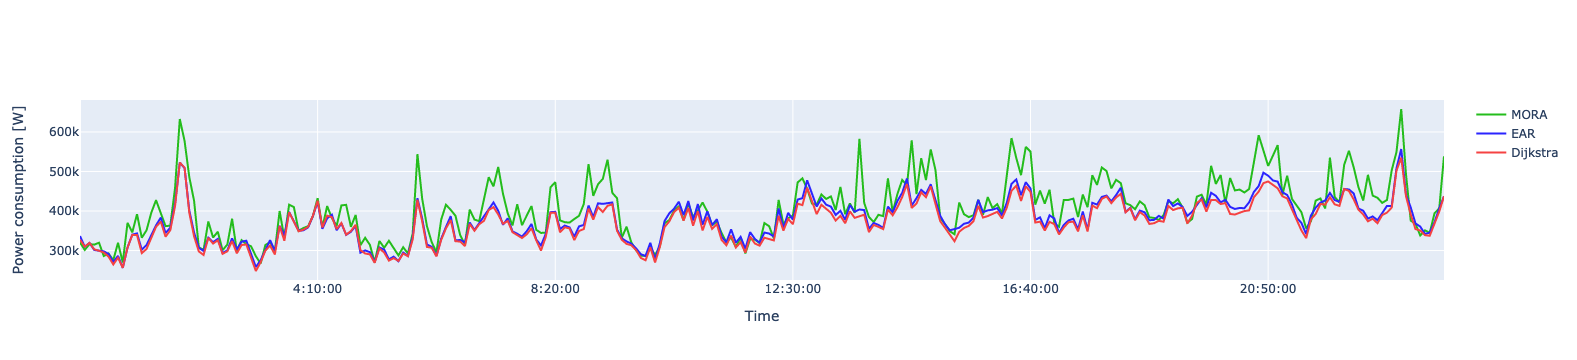

In [142]:
plot_compare('Power consumption [W]')

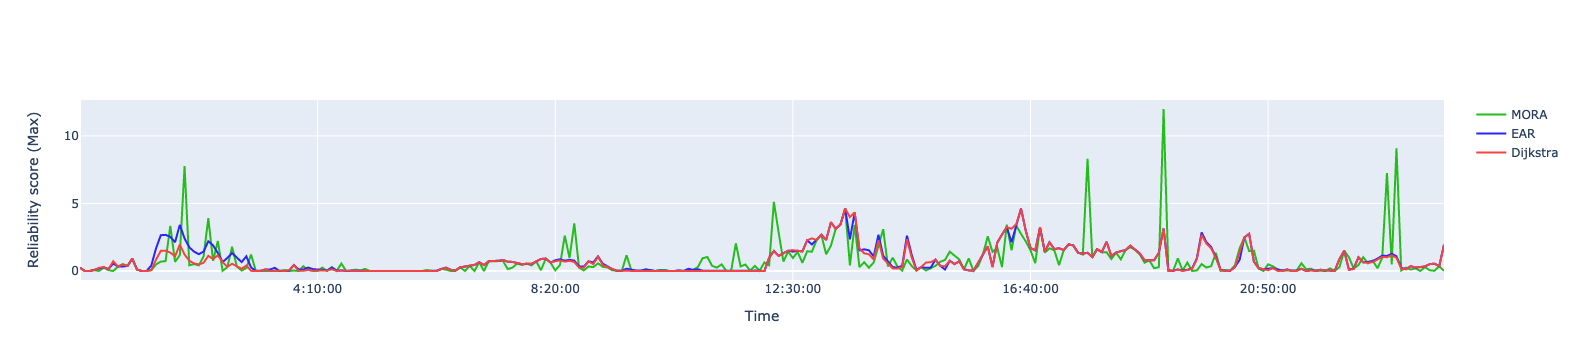

In [143]:
plot_compare('Reliability score (Max)')

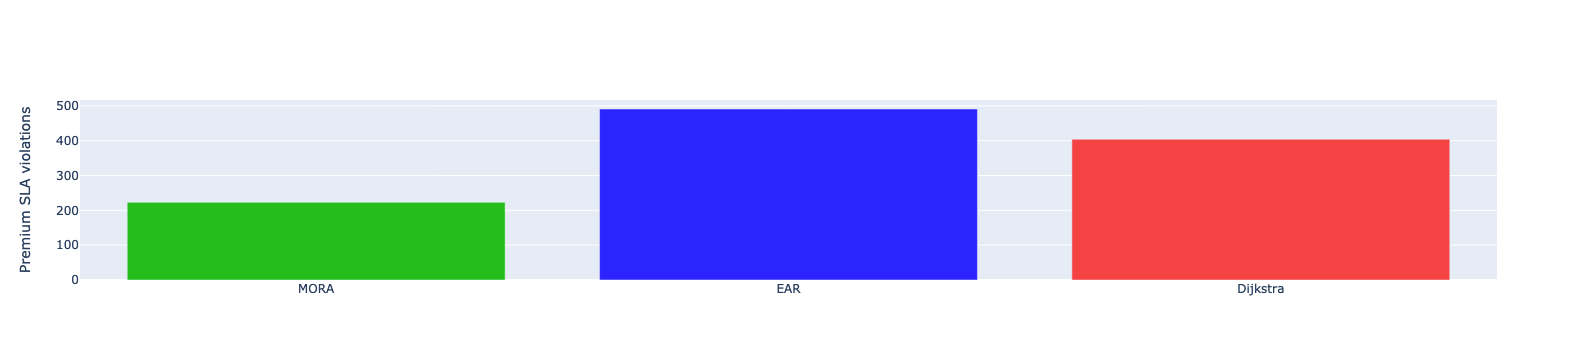

In [144]:
bar_plot_compare('Premium SLA violations')

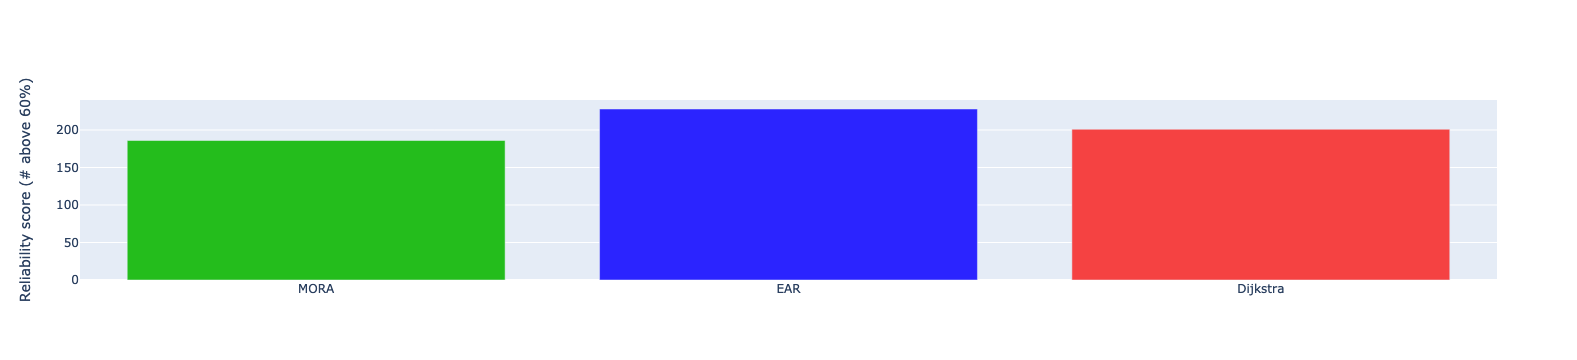

In [145]:
bar_plot_compare('Reliability score (# above 60%)')

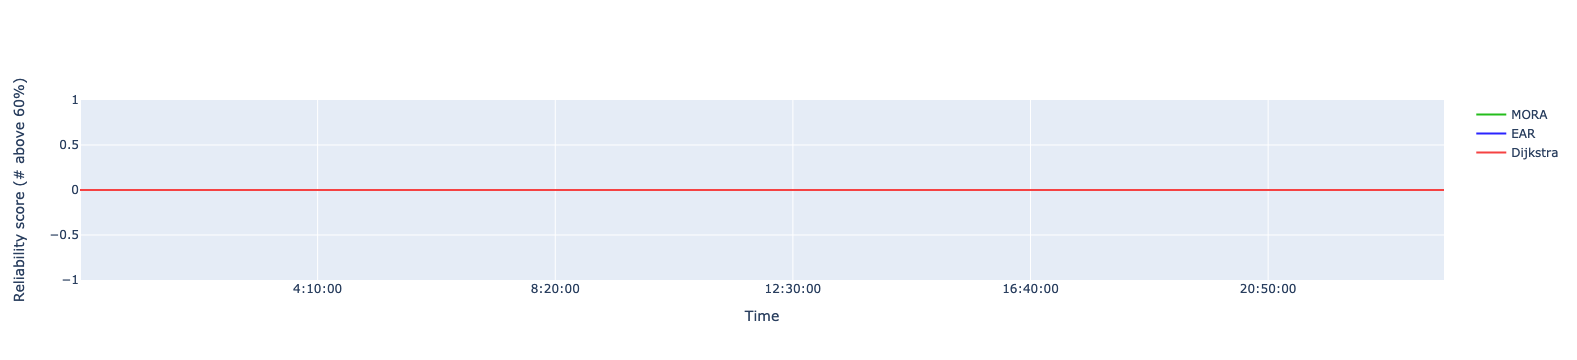

In [130]:
plot_compare('Reliability score (# above 60%)')

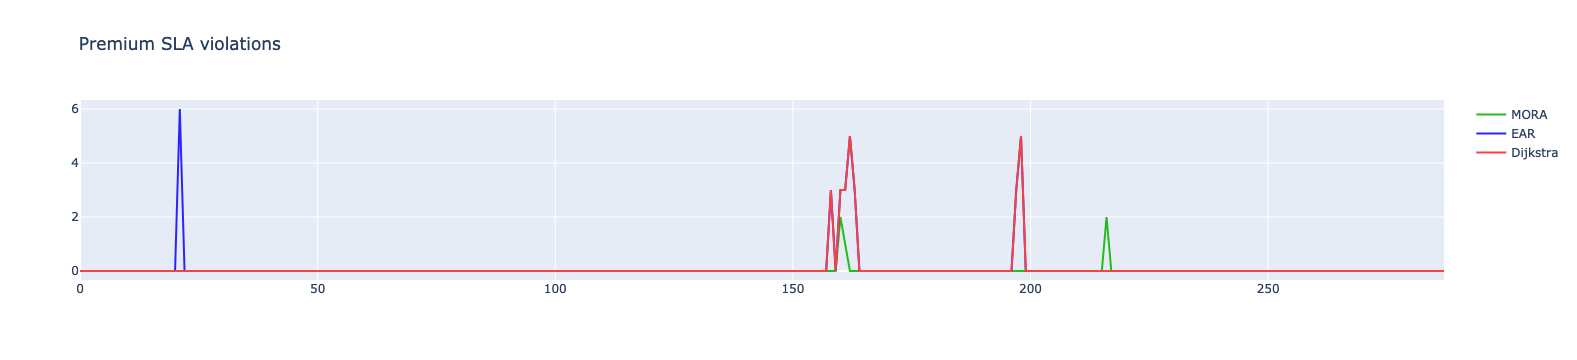

In [85]:
plot_compare('Premium SLA violations')

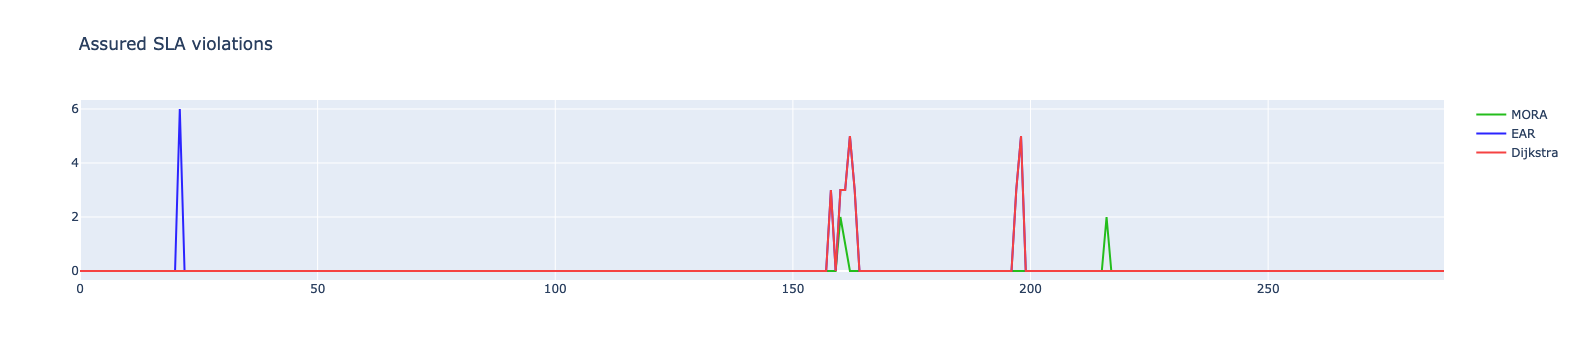

In [86]:
plot_compare('Assured SLA violations')

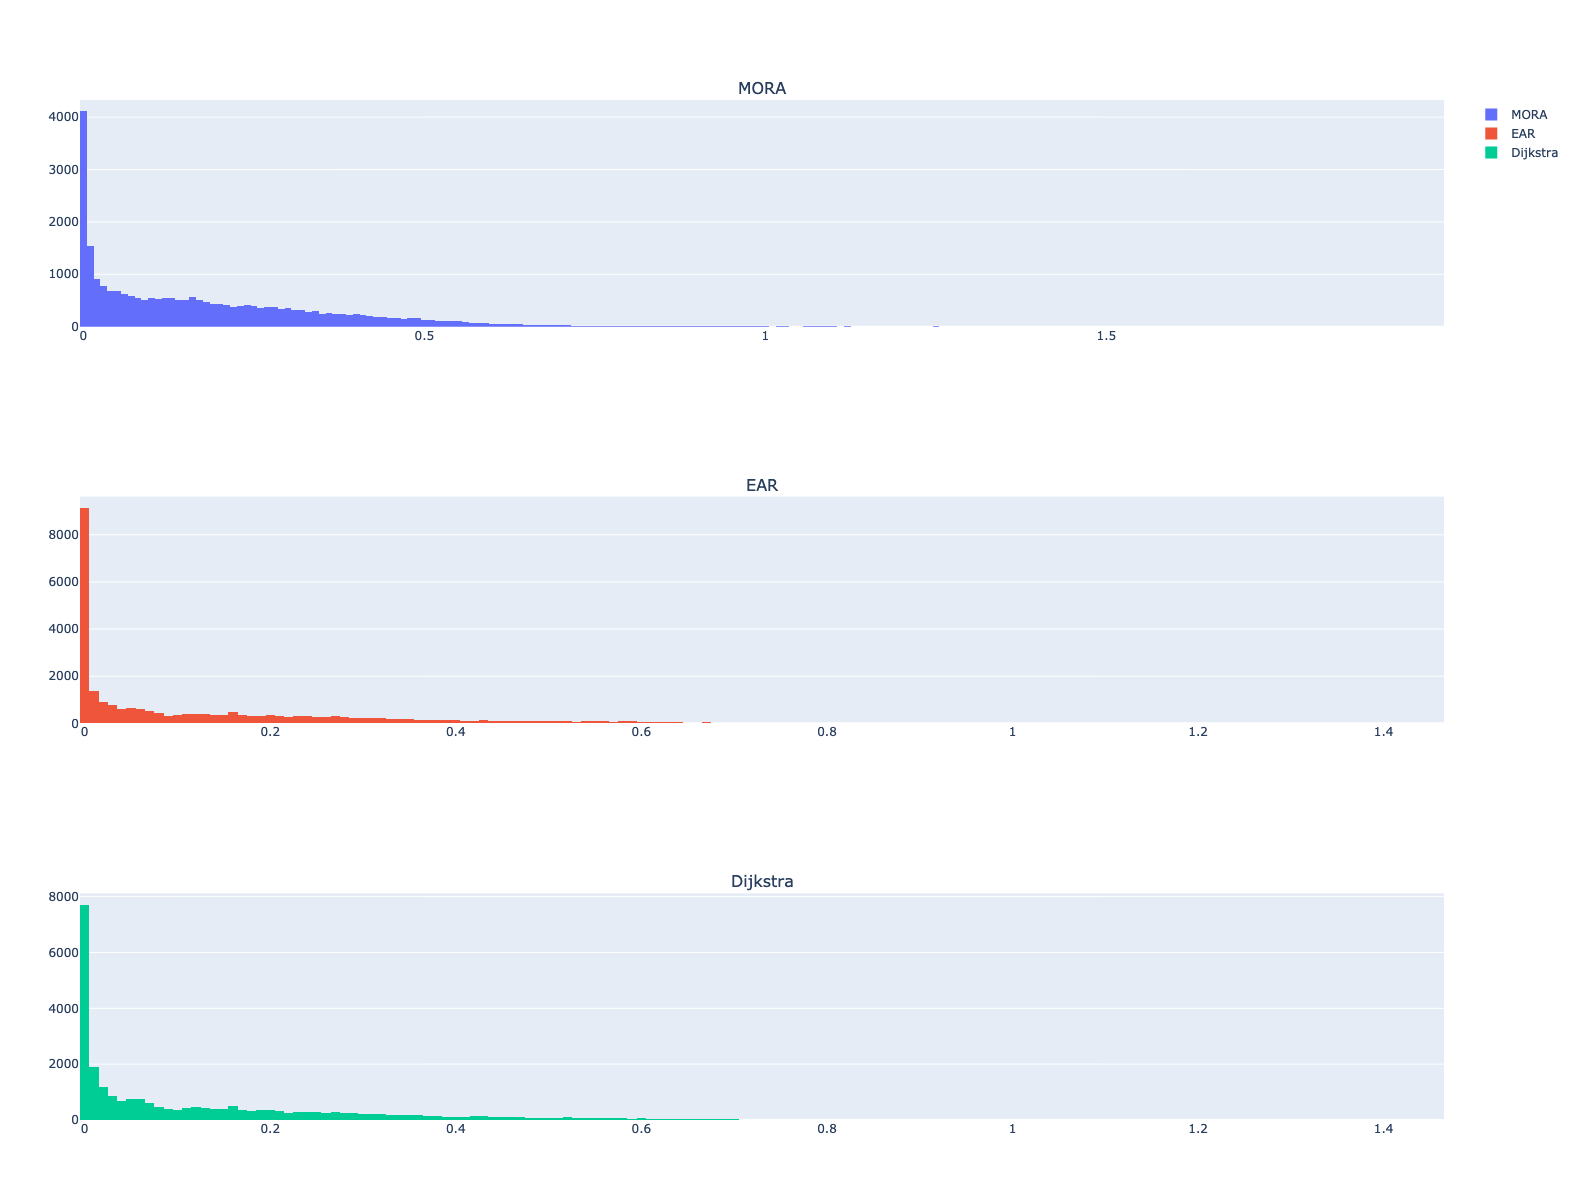

In [12]:
cat = []
for idx, df in enumerate([df_MORA['Link usage'], df_EAR['Link usage'], df_D['Link usage']]):
    cat.append([])
    for row in df:
        l = json.loads(row)
        cat[idx] = cat[idx] +l

names = ['MORA', 'EAR', 'Dijkstra']
fig = make_subplots(rows=len(cat), cols=1, subplot_titles=('MORA', 'EAR', 'Dijkstra'))

for alg in range(len(cat)):
    fig.add_trace(go.Histogram(x=cat[alg], name=names[alg]), row = alg+1, col=1)
    
fig.update_layout(
autosize=False,
width=1700,
height=1200,)

fig.show()